# Predicting House Prices: Exploratory Data Analysis and Linear Regression Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 6]
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

In [4]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766729.247706,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870439.615657,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [248]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Performing EDA

#### Distplot for all numeric variables

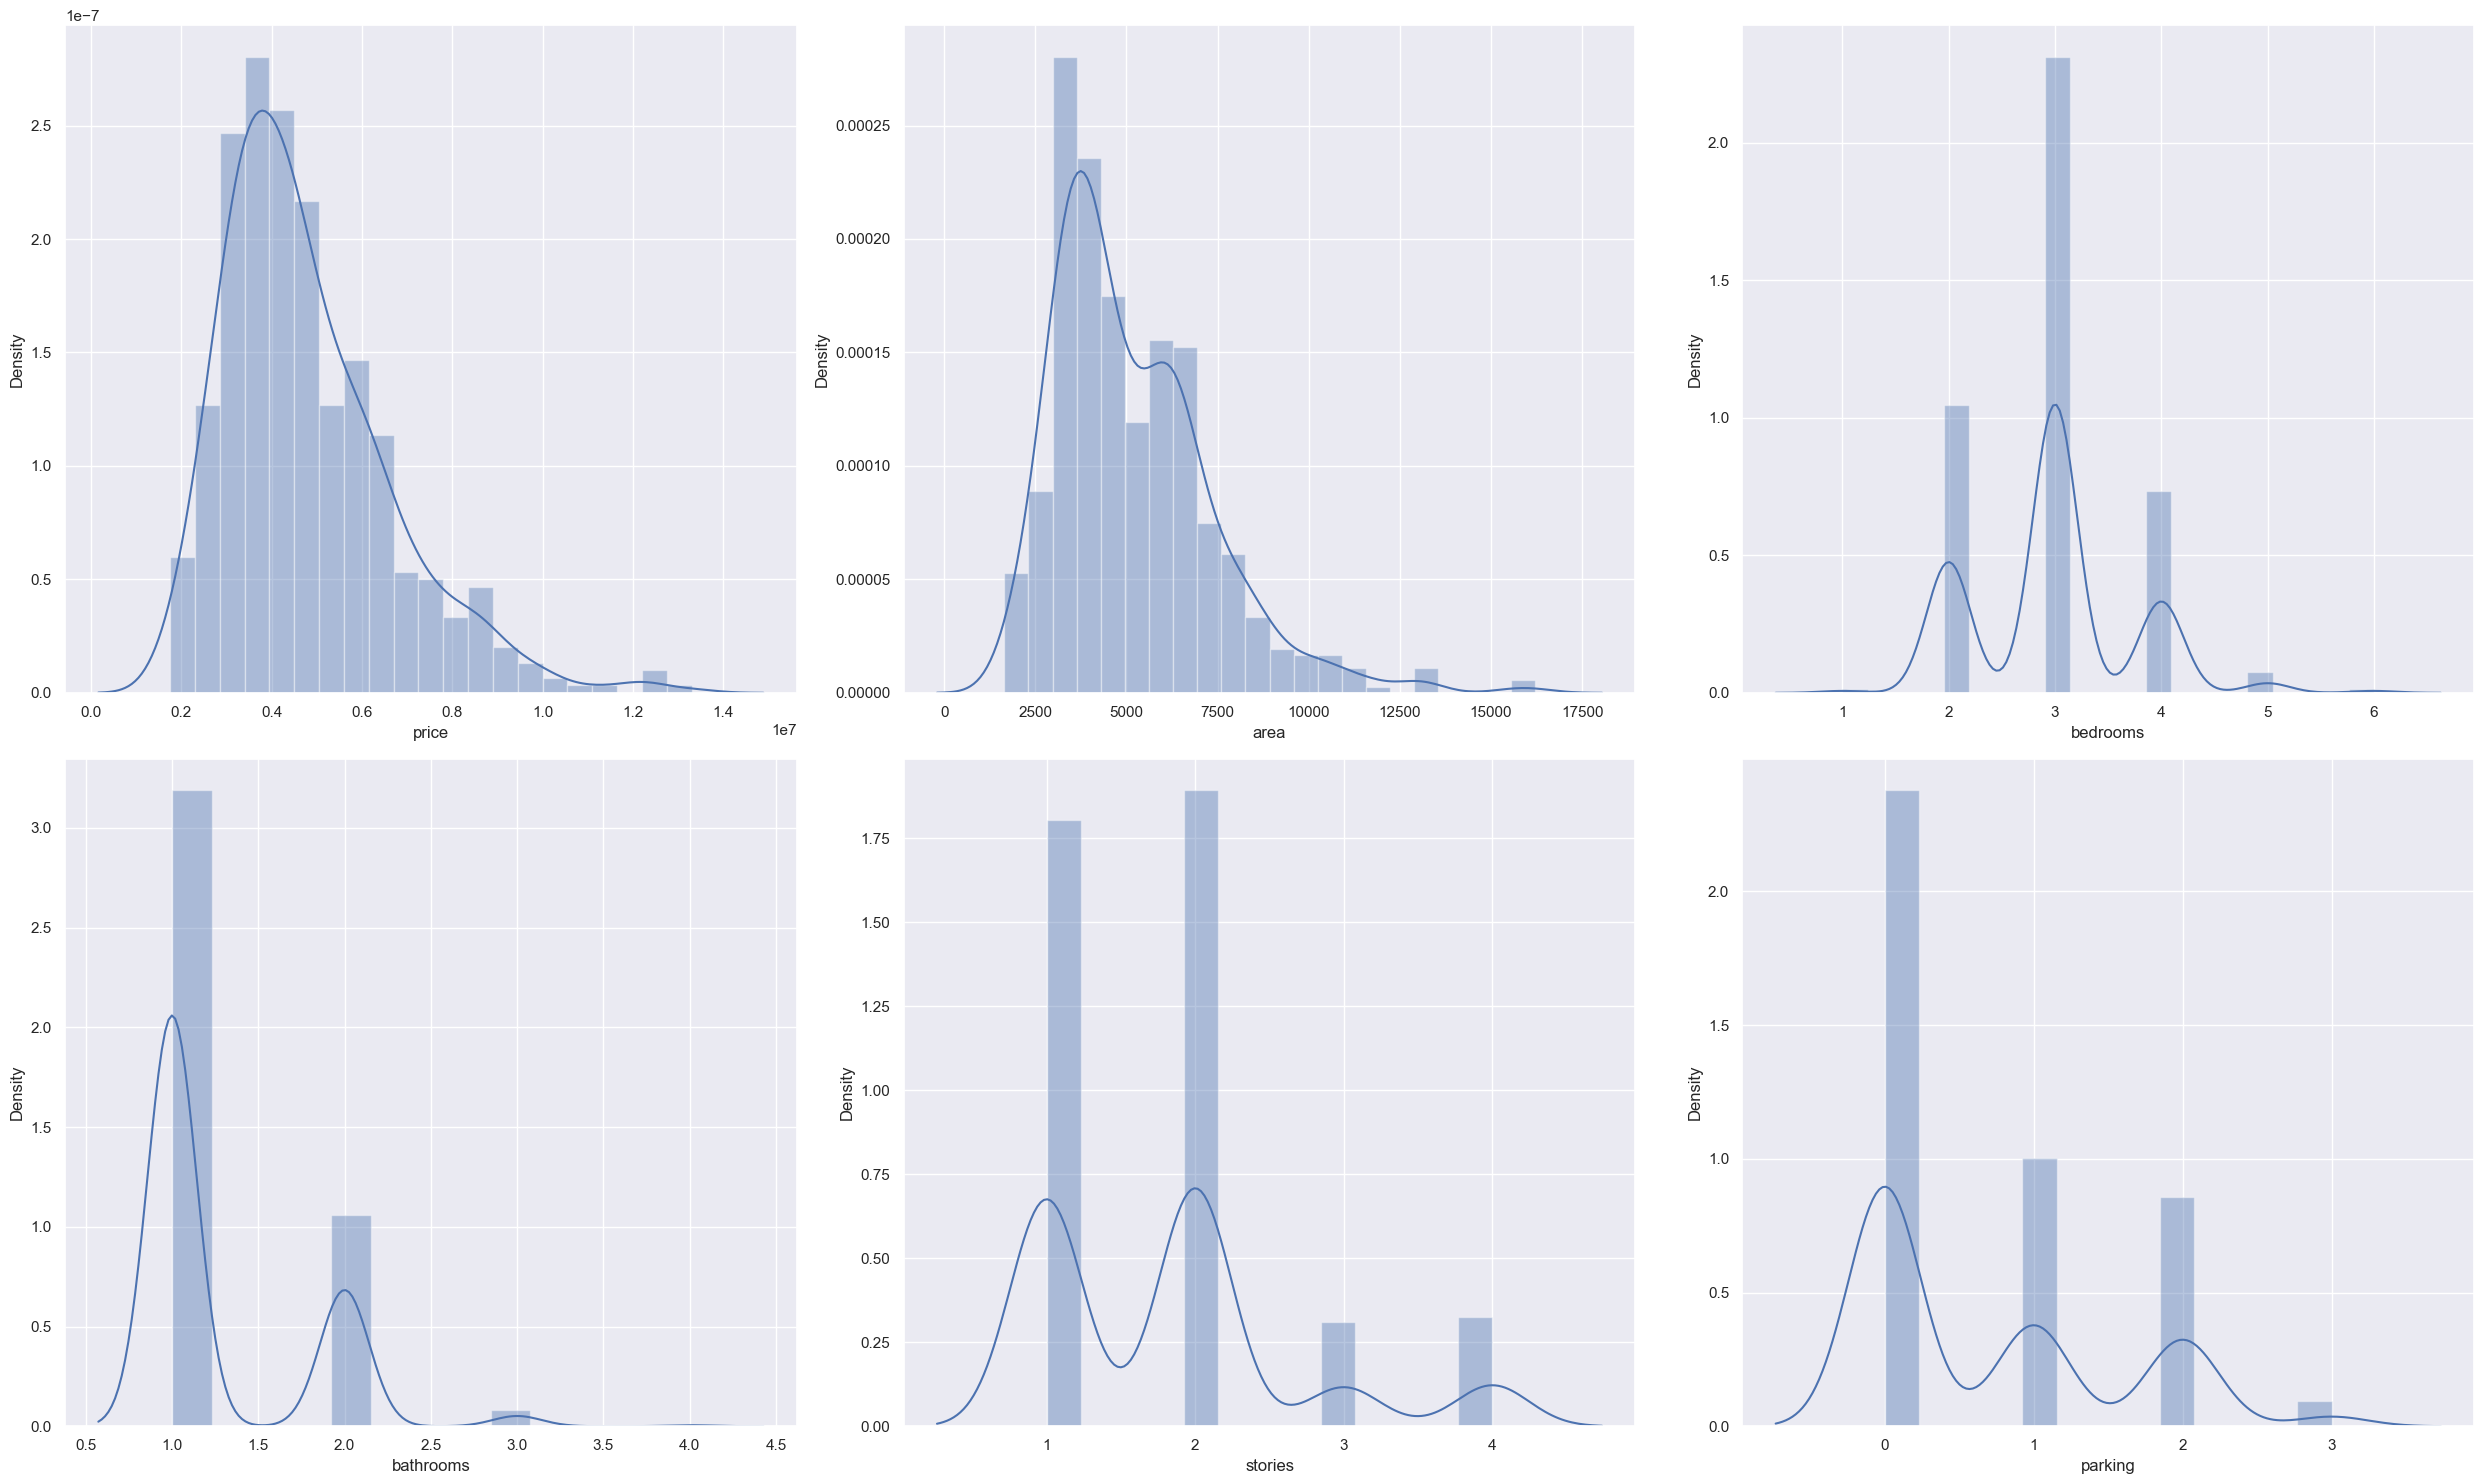

In [249]:
cols=list(df.select_dtypes(include=np.number).columns)

fig, ax= plt.subplots(2,3, figsize=(25,15))
for i, subplot in zip(cols, ax.flatten()):
    sns.distplot(df[i], ax=subplot,kde=True)
#     sns.set(font_scale=2)

plt.tight_layout()
plt.show()

In [250]:
#price and area is continuous variables, all others are descrete variables

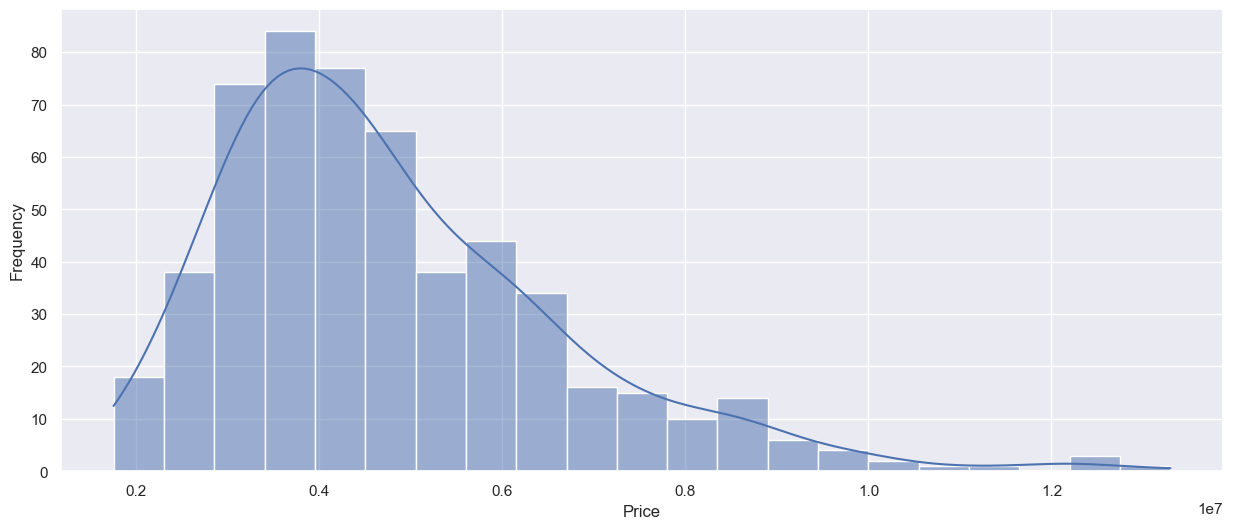

In [251]:
sns.histplot(df['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most of the house price are in the price range between 20,00,000 to 70,00,000

Some of the outliers are above 1 crore which is at the right tail

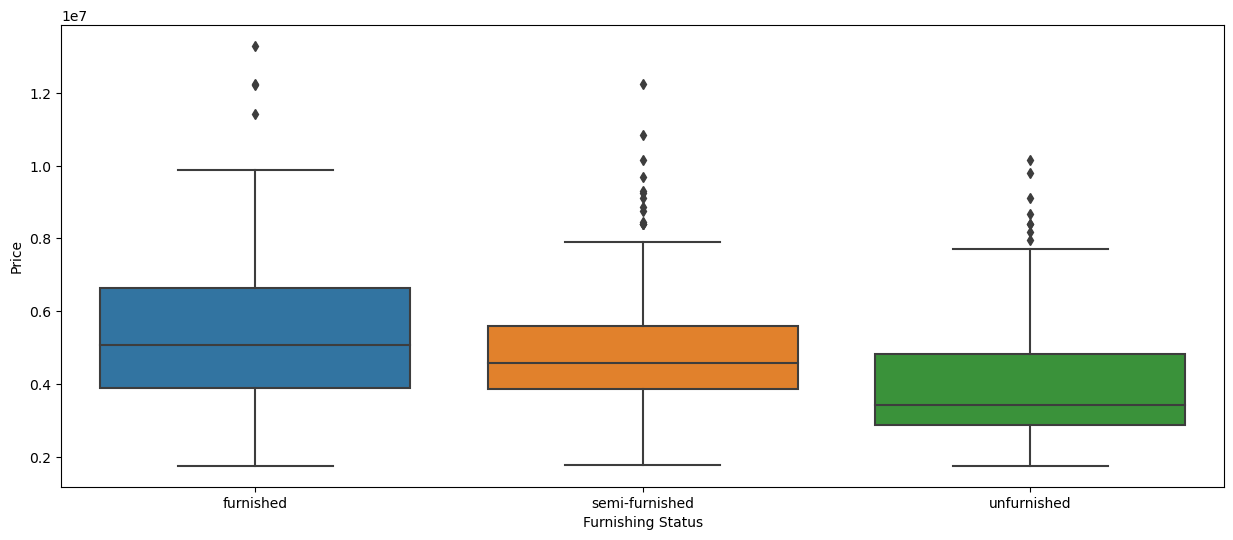

In [13]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='price'>

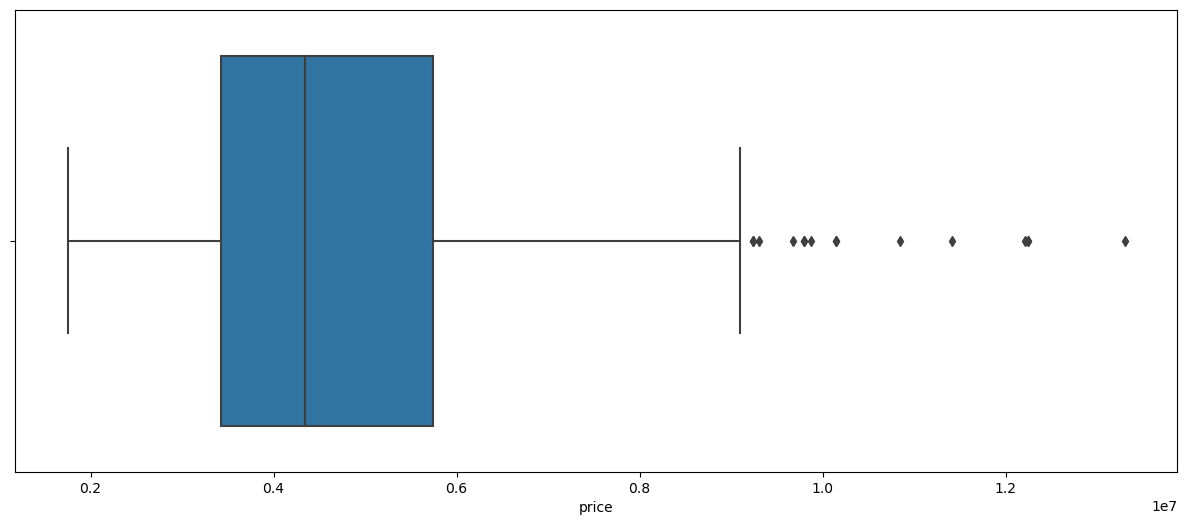

In [15]:
sns.boxplot(x='price', data=df)


50% of the furnished house prices are between 40 lakhs and 65 lakhs.
50% of the semi-furnished house prices are between 40 lakhs and 50 lakhs.
50% of the unfurnished house prices are between 30 lakhs and 45 lakhs.

Most of the extreme outliers are seen in semi_furnished.

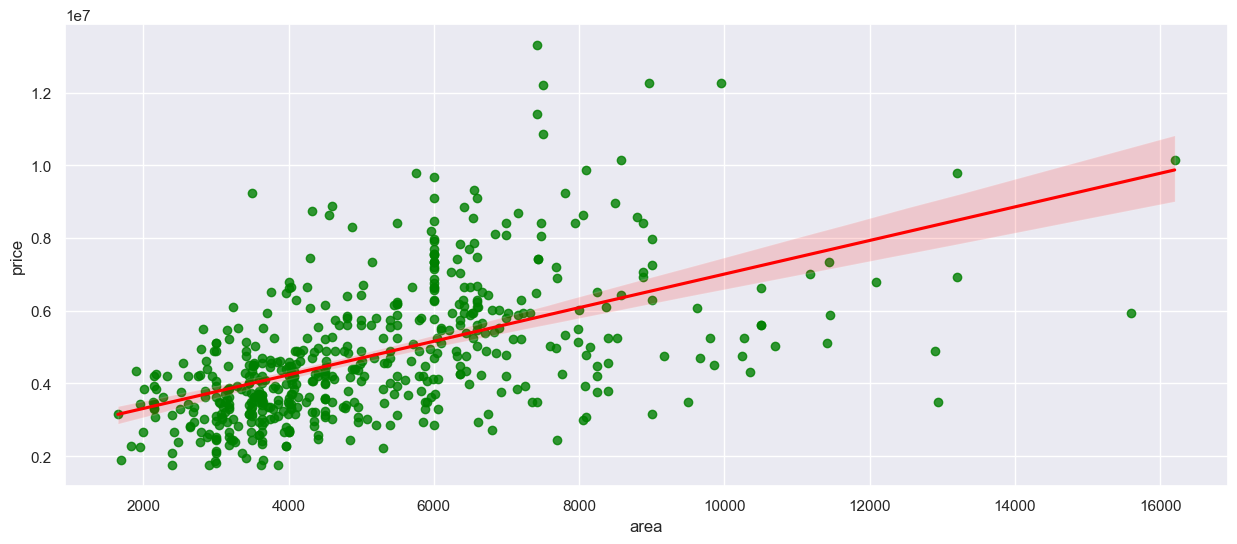

In [253]:
sns.regplot(data=df,x='area', y='price', scatter=True, color='green', line_kws={"color": "red"})
plt.show()

Here as the 
area increases the price also increases. So we assume there is a relation between area and price

#### Boxplot

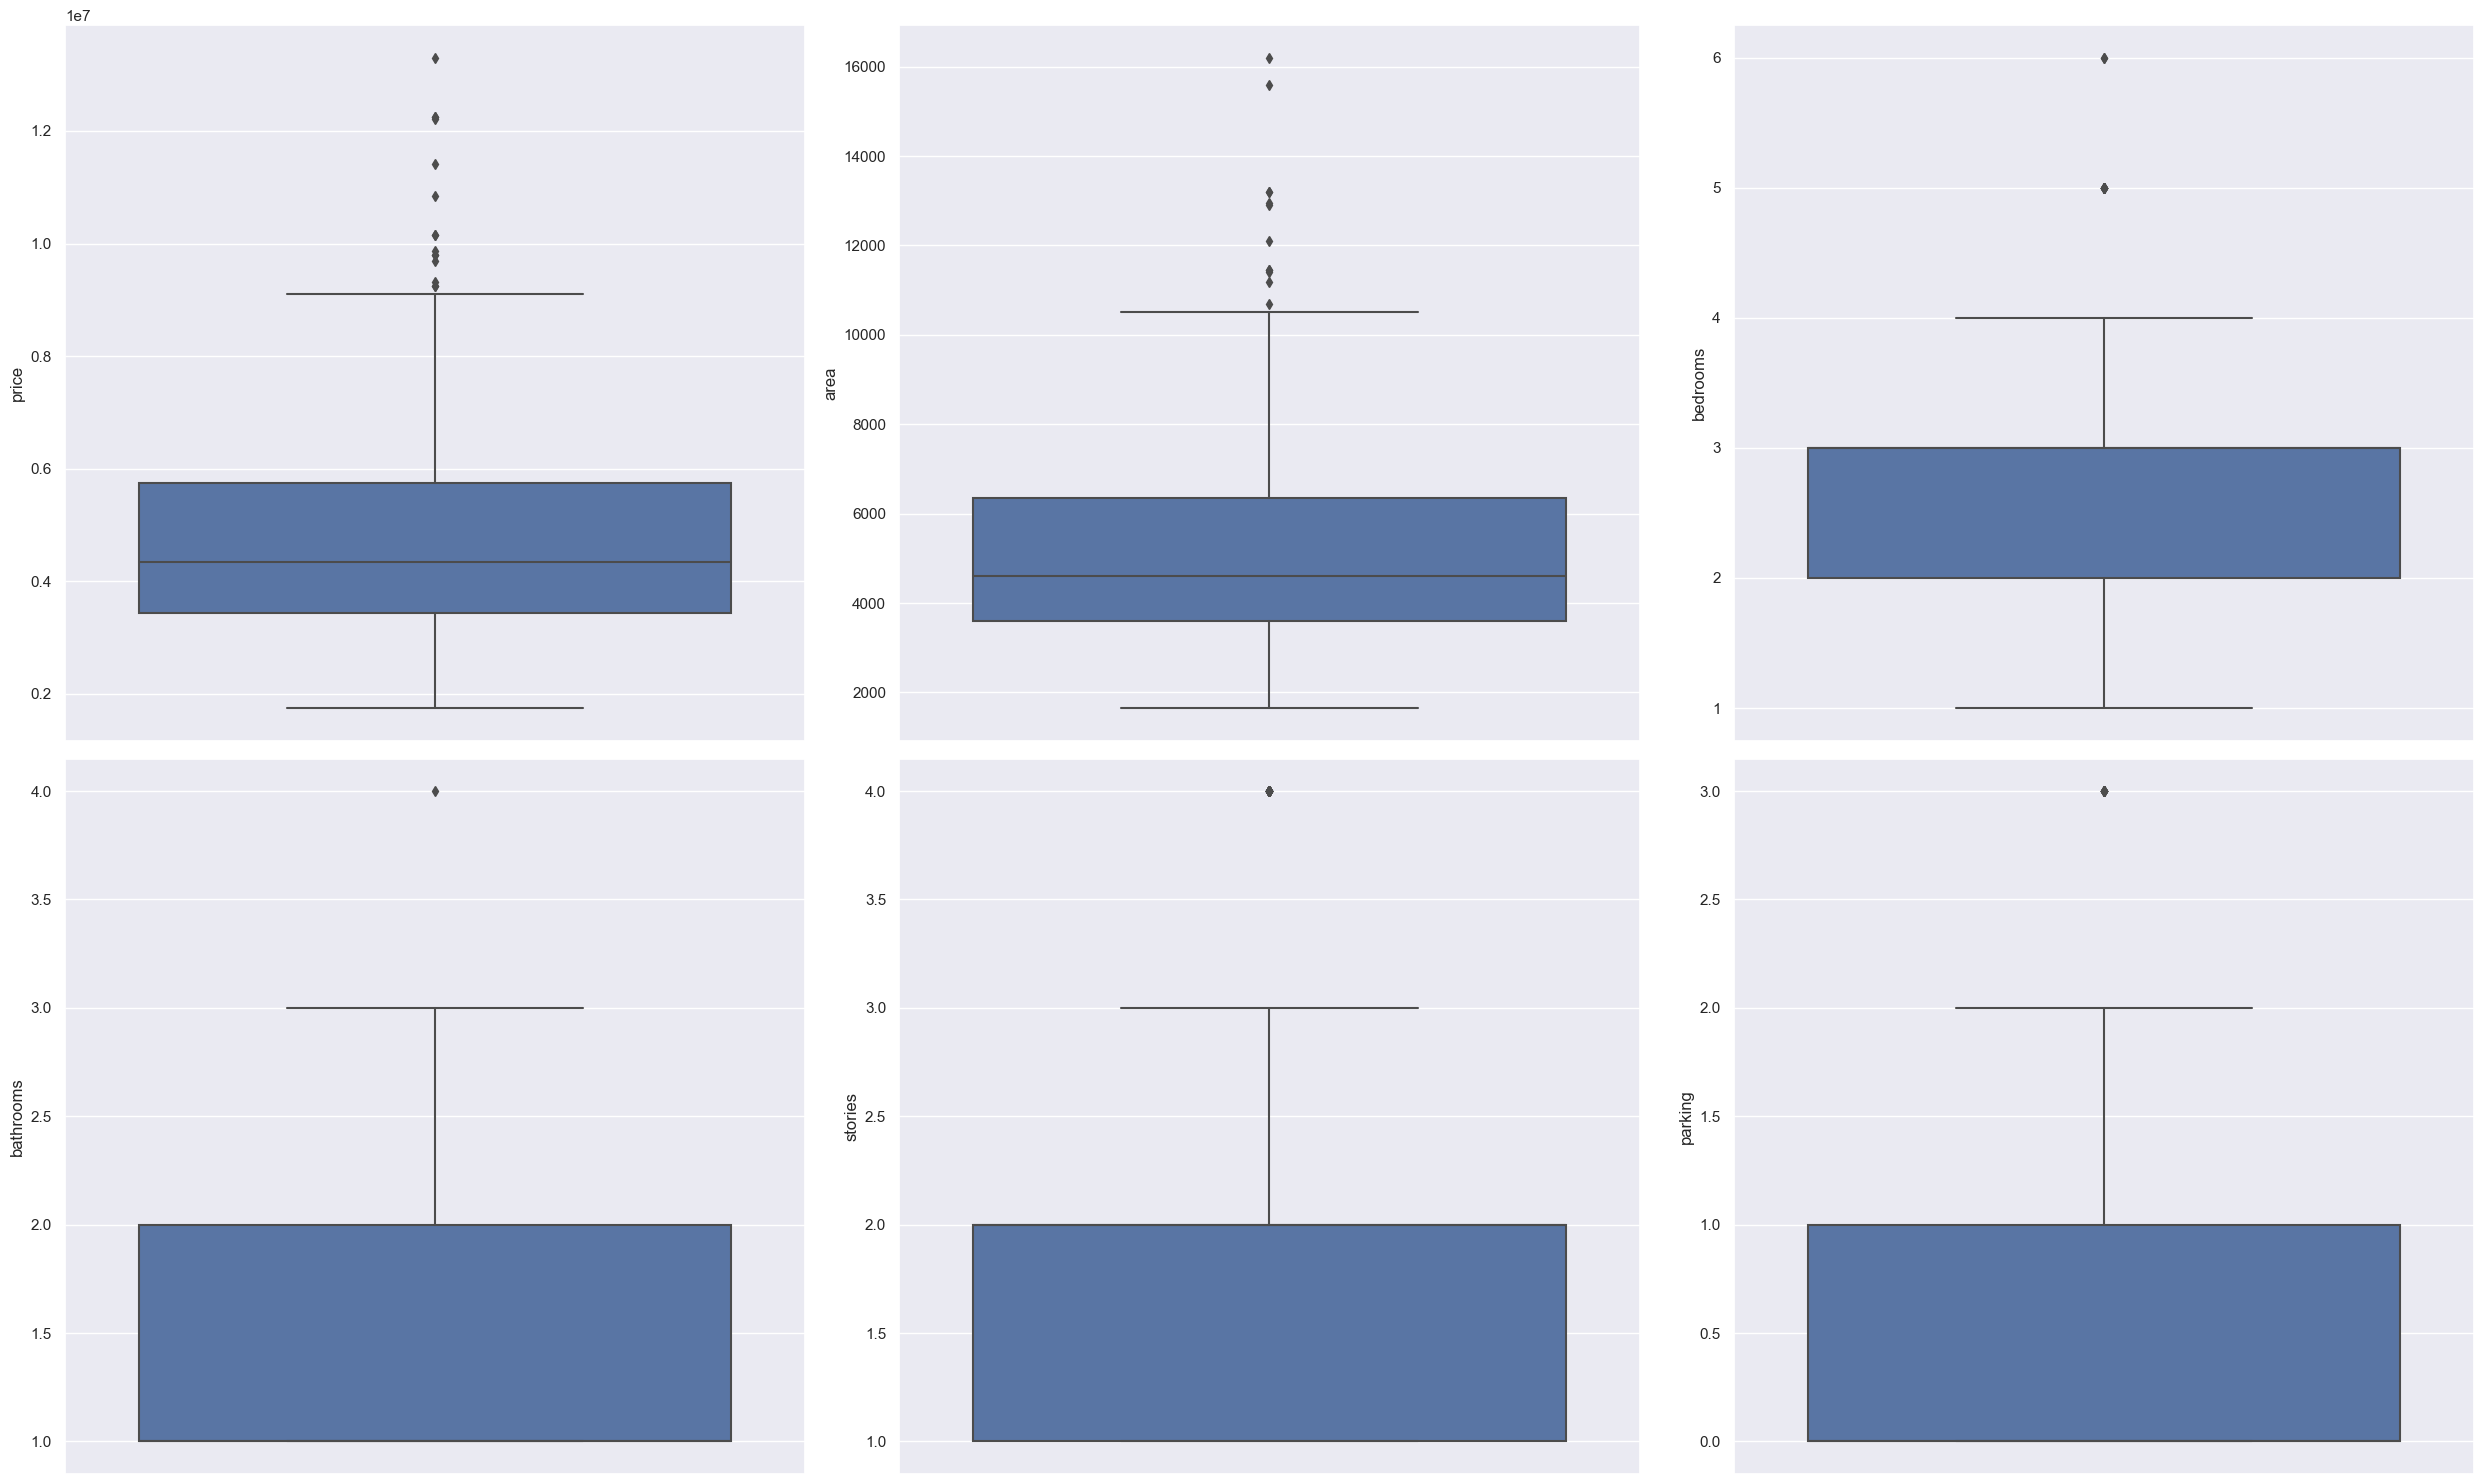

In [254]:
fig, ax= plt.subplots(2,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(y = df[i], ax=subplot)
#     sns.set(font_scale=15)

plt.tight_layout()
plt.show()

In [255]:
#there exist few outliers in area and price column, other columns have little tp no outliers

#### Bivariate Analysis

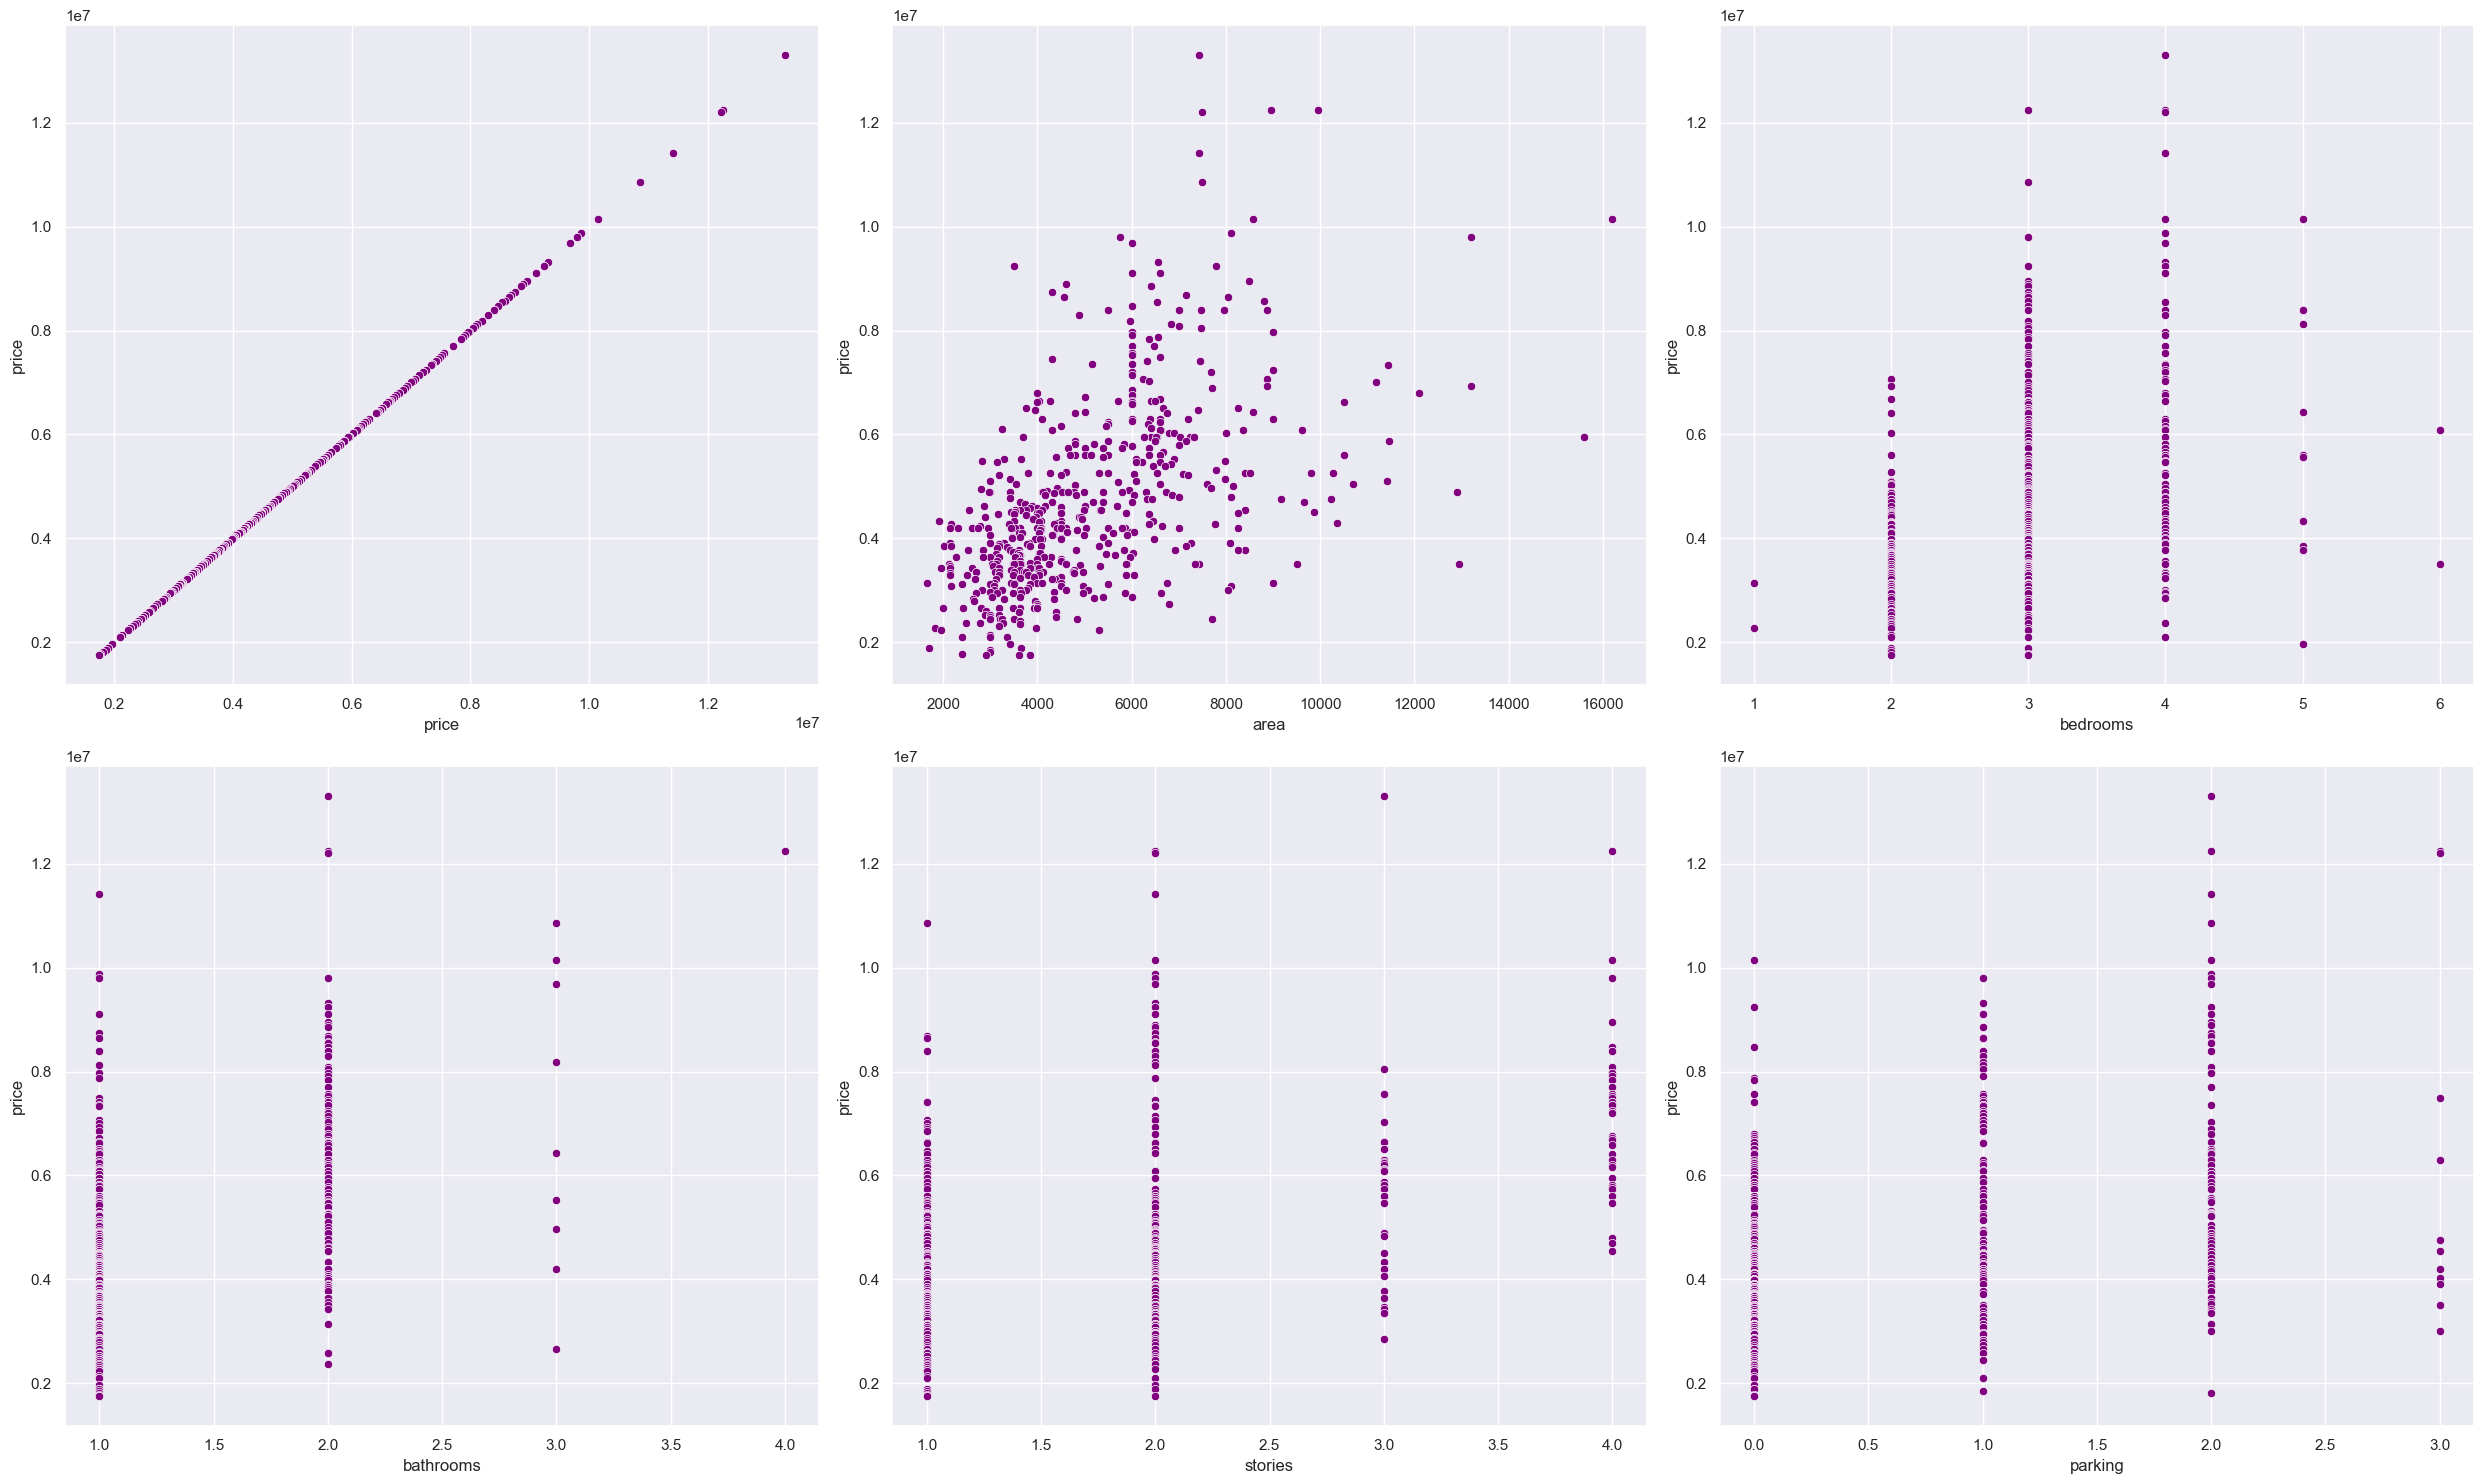

In [256]:
fig, ax= plt.subplots(2,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df[i],y=df['price'], ax=subplot,color='purple')
#     sns.set(font_scale=15)

plt.tight_layout()
plt.show()

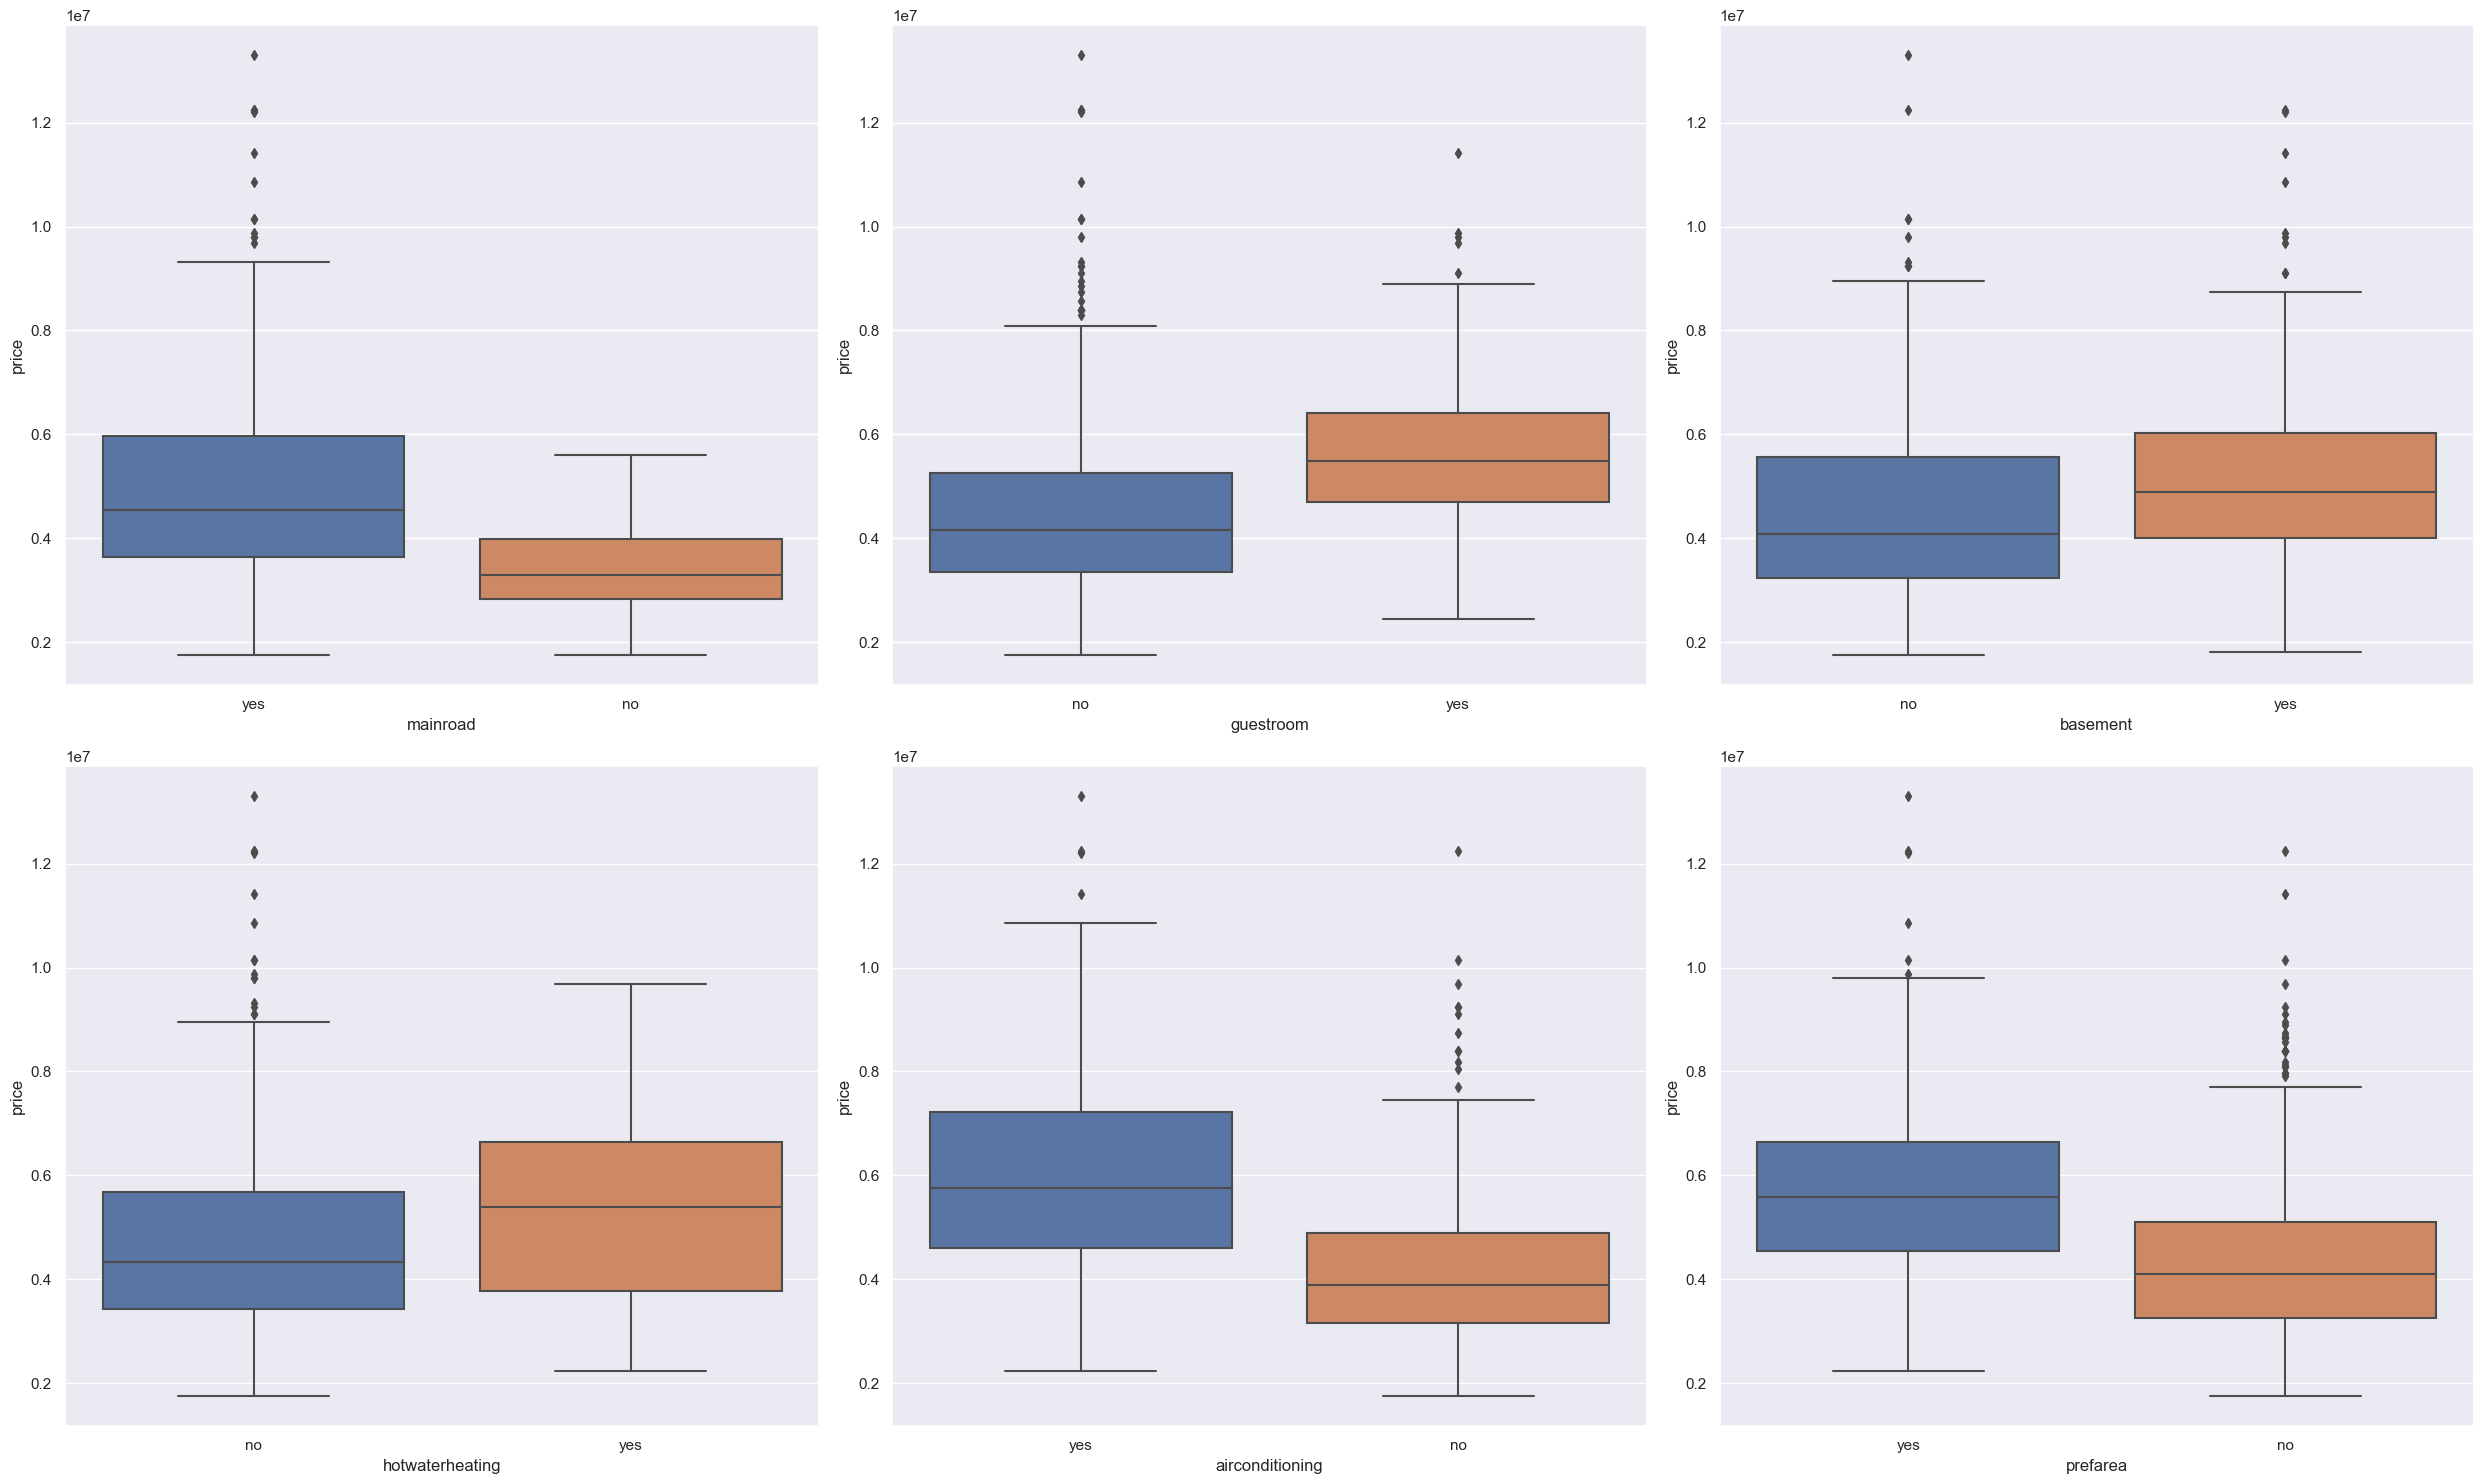

In [257]:
cols=list(df.select_dtypes(exclude=np.number).columns)

fig, ax= plt.subplots(2,3, figsize=(25,15))
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(x = df[i],y = df['price'], ax=subplot)
#     sns.set(font_scale=0.5)

plt.tight_layout()
plt.show()

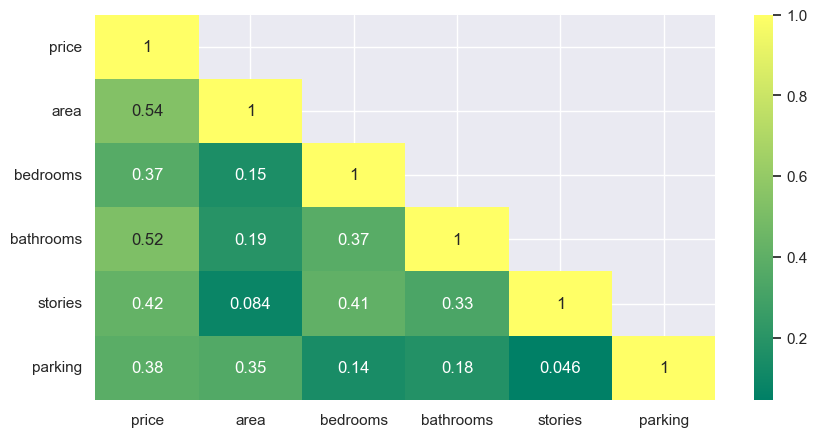

In [258]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='summer',mask=np.triu(df.corr(),+1))
plt.show()

In [259]:
# light correation can be found between area - price, as well as stories-price

# Data Cleaning and Preparation

In [260]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [261]:
print(df_num.shape)
print(df_cat.shape)

(545, 6)
(545, 7)


#### Dummy Encoding for categorical encoding

In [262]:
dummy = pd.get_dummies(df_cat.drop(['furnishingstatus'], axis=1), drop_first=True)

In [263]:
#droppping furnishing status as we will use onhot encoder to encode it

In [264]:
from sklearn.preprocessing import OrdinalEncoder

In [265]:
oe = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
dummy['furnishingstatus_encoded'] = oe.fit_transform(df_cat[['furnishingstatus']])


In [266]:
dummy.head(2)

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_encoded
0,1,0,0,0,1,1,2.000000
1,1,0,0,0,1,0,2.000000


In [267]:
df_final=pd.concat([df_num,dummy],axis=1)

# Building Model

In [268]:
# split data in x and y
X = df_final.drop('price', axis = 1)
y = df_final['price']

In [269]:
# skelarn model
#split data in Train ans Test
#take all the x together and then all y together
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=1)

In [270]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(436, 12)
(109, 12)
(436,)
(109,)


In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

##### model_lr

In [272]:
lr = LinearRegression()

#build the model and find the r2score with RMSE

model_lr = lr.fit(xtrain, ytrain)

pred_train = model_lr.predict(xtrain)

pred_test = model_lr.predict(xtest)

In [273]:
r2_train = r2_score(ytrain, pred_train)
r2_test = r2_score(ytest, pred_test)
print("R2 Train:", r2_train)
print("R2 Test:", r2_test)

R2 Train: 0.6946575070270329
R2 Test: 0.6183140939593397


In [274]:
# Underfit Model!!!

In [275]:
print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred_train)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))

RMSE Train: 1006137.7454511103
RMSE Test: 1266007.0072033568


# Statsmodel

In [276]:
import statsmodels.api as sma

temp_x = sma.add_constant(X)
x_train, x_test, y_train, y_test = train_test_split(temp_x,y,test_size=0.2,random_state=1)

##### stats_model

In [277]:
stats_model = sma.OLS(y_train, x_train).fit()
print('R-squared:',stats_model.rsquared)
print('Adj. R-squared:',stats_model.rsquared_adj)

R-squared: 0.694657507027033
Adj. R-squared: 0.6859953086448212


In [278]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     80.19
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          6.66e-101
Time:                        23:09:26   Log-Likelihood:                -6644.9
No. Observations:                 436   AIC:                         1.332e+04
Df Residuals:                     423   BIC:                         1.337e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.123e+05   2.53e+05     -1.232      0.218    -8.1e+05    1.86e+05
area                       234.4747     25.695      9.125      0.000     183.969     284.980
bedrooms                  9.577e+04   7.74e+04      1.237      0.217   -5.64e+04    2.48e+05
bathrooms                  1.04e+06   1.12e+05      9.307      0.000     8.2e+05    1.26e+06
stories                   4.931e+05    7.1e+04      6.942      0.000    3.54e+05    6.33e+05
parking                   2.638e+05    6.3e+04      4.186      0.000     1.4e+05    3.88e+05
mainroad_yes              4.311e+05    1.5e+05      2.865      0.004    1.35e+05    7.27e+05
guestroom_yes             3.281e+05   1.43e+05      2.292      0.022    4.68e+04    6.09e+05
basement_yes               4.91e+05    1.2e+05      4.097      0.000    2.55e+05    7.27e+05
hotwaterheating_yes       9.409e+05   2.39e+05      3.932      0.000     4.7e+05    1.41e+06
airconditioning_yes       6.693e+05   1.17e+05      5.736      0.000     4.4e+05    8.99e+05
prefarea_yes              5.893e+05   1.24e+05      4.763      0.000    3.46e+05    8.32e+05
furnishingstatus_encoded  1.984e+05   6.76e+04      2.935      0.004    6.55e+04    3.31e+05
==============================================================================
Omnibus:                       68.269   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.608
Skew:                           0.819   Prob(JB):                     4.41e-34
Kurtosis:                       5.402   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Durbin-Watson : 2.074
###### hence very less autocorrelation

#### Normality Test

In [279]:
stats.jarque_bera(stats_model.resid)

SignificanceResult(statistic=153.6075768748051, pvalue=4.411014570757761e-34)

### Transforming Boxcox

In [280]:
model_boxcox = sma.OLS(stats.boxcox(y_train)[0], x_train).fit()
print(model_boxcox.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     81.75
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          4.06e-102
Time:                        23:09:26   Log-Likelihood:                 739.99
No. Observations:                 436   AIC:                            -1454.
Df Residuals:                     423   BIC:                            -1401.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [281]:
#Prob JB Decreased after transformation

#### Some more models with other transformations

In [282]:
model_sqrt = sma.OLS(np.sqrt(y_train), x_train).fit() #sqr root
model_cbrt = sma.OLS(np.cbrt(y_train), x_train).fit() #cube root transformation
model_yojh = sma.OLS(stats.yeojohnson(y_train)[0], x_train).fit() #ytojohnson

### Function to tabulate

In [283]:
transf_score = pd.DataFrame(columns=['Transformation',
                                     'R_Squared',
                                      'Adj Rsquared' ]
                                  )


def update_transformation (name,
                           model
                           ):

    # assign 'comp_perf' as global variable
    global transf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    transf_score = transf_score.append({'Transformation'    : name,
                                        'R_Squared'         : model.rsquared,
                                        'Adj Rsquared'    : model.rsquared_adj
                                    },
                                   ignore_index = True)

In [284]:
update_transformation(name = "Square Root", model = model_sqrt)
update_transformation(name = "Cube Root", model = model_cbrt)
update_transformation(name = "Boxcox", model = model_boxcox)
update_transformation(name = "Yeo Johnson", model = model_yojh)

In [285]:
transf_score

,Transformation,R_Squared,Adj Rsquared
0,Square Root,0.709144,0.700893
1,Cube Root,0.709377,0.701132
2,Boxcox,0.698713,0.690166
3,Yeo Johnson,0.698713,0.690166


In [286]:
#functino to get r sq , adj-R sq, train RMSE, test RMSE
def Metrics(model):

    if model == model_lr :



         pred_test = model.predict(xtest)

         rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    elif model == sfs_forward:


         rmse_test=abs(sfs_forward.k_score_)

    elif model == sfs_backward:

         rmse_test=abs(sfs_backward.k_score_)

    elif model== rfe:

            rmse_test =np.sqrt(mean_squared_error(ytest,
                                     pred))
    else:

        rmse_test = np.mean(model)


    return (round(rmse_test,6))

In [287]:
#create and empty dataframe to store score for variour algorithm 

perf_score = pd.DataFrame(columns = ['Model', 'RMSE'])

In [288]:
def update_performance (name,
                        model
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    'RMSE'           : Metrics(model)
                                    },
                                   ignore_index = True)

In [289]:
update_performance(name = 'Linear Regression', model = model_lr)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203


In [290]:
from mlxtend.feature_selection import SequentialFeatureSelector

#### SFS with 5 features

In [291]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features=5,
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

In [292]:
sfs_forward.fit(xtrain, ytrain)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='neg_root_mean_squared_error')

In [293]:
sfs_forward.k_feature_names_

('area', 'bathrooms', 'stories', 'parking', 'basement_yes')

In [294]:
update_performance(name='SFS with 5 Features',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624


#### SFS with 4-7 features

In [295]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features=(4,7),
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

In [296]:
sfs_forward.fit(xtrain, ytrain)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(4, 7),
                          scoring='neg_root_mean_squared_error')

In [297]:
sfs_forward.k_feature_names_

('area',
 'bathrooms',
 'stories',
 'parking',
 'basement_yes',
 'airconditioning_yes',
 'prefarea_yes')

In [298]:
update_performance(name='SFS with 4-7 Features',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624
2,SFS with 4-7 Features,1073416.885345


#### SFS Best

In [299]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr,
                                       k_features='best',
                                       forward=True,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

sfs_forward.fit(xtrain, ytrain)

update_performance(name='SFS with Best',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624
2,SFS with 4-7 Features,1073416.885345
3,SFS with Best,1032869.538360


#### Backward

In [300]:
lr = LinearRegression()
sfs_backward = SequentialFeatureSelector(estimator = lr,
                                       k_features='best',
                                       forward=False,
#                                        verbose=2,
                                       scoring = "neg_root_mean_squared_error")

sfs_backward.fit(xtrain, ytrain)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 12),
                          scoring='neg_root_mean_squared_error')

In [301]:
sfs_backward.k_feature_names_

('area',
 'bathrooms',
 'stories',
 'parking',
 'mainroad_yes',
 'guestroom_yes',
 'basement_yes',
 'hotwaterheating_yes',
 'airconditioning_yes',
 'prefarea_yes',
 'furnishingstatus_encoded')

In [302]:
update_performance(name='Backward SFS with Best',model=sfs_forward)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624
2,SFS with 4-7 Features,1073416.885345
3,SFS with Best,1032869.538360
4,Backward SFS with Best,1032869.538360


#### RFE

In [303]:
from sklearn.feature_selection import RFE

lr = LinearRegression()

In [304]:
rfe = RFE(estimator=lr,
         n_features_to_select=5)

In [305]:
rfe.fit(xtrain, ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [306]:
pd.DataFrame(rfe.ranking_,index=xtrain.columns)

,0
area,8
bedrooms,7
bathrooms,1
stories,4
parking,3
mainroad_yes,1
guestroom_yes,2
basement_yes,5
hotwaterheating_yes,1
airconditioning_yes,1


In [307]:
feature_index = pd.Series(rfe.ranking_,index=xtrain.columns).sort_values(ascending=False)

In [308]:
impfeature_rfe = feature_index[feature_index==1].index

In [309]:
impfeature_rfe

Index(['bathrooms', 'mainroad_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [310]:
rfe_train = xtrain.loc[:,impfeature_rfe]
rfe_test = xtest.loc[:,impfeature_rfe]

In [334]:
lr = LinearRegression()

lr.fit(rfe_train, ytrain)

pred = lr.predict(rfe_test)

rfe_rmse = np.sqrt(mean_squared_error(ytest,pred))

rfe_rmse

1512009.6728444395

In [336]:
update_performance(name='RFE',model=rfe)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624
2,SFS with 4-7 Features,1073416.885345
3,SFS with Best,1032869.538360
4,Backward SFS with Best,1032869.538360
5,RFE,1512009.672844
6,K Fold,1054771.561956
7,LOOCV,771290.807626
8,RFE,1512009.672844


In [313]:
x = df_final.drop('price', axis = 1)
# condider the dependent cariables
y = df_final['price']

In [314]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=1)

In [315]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [316]:
kf = KFold(n_splits=5,shuffle=True, random_state=1)

In [324]:
lr = LinearRegression()
prediction_ml = []
rmse_kf = []

for train_index, test_index in kf.split(xtrain):
    kf_xtrain = xtrain.iloc[train_index]
    kf_xtest = xtrain.iloc[test_index]
    kf_ytrain = ytrain.iloc[train_index]
    kf_ytest = ytrain.iloc[test_index]
    
    prediction_ml.append(lr.fit(kf_xtrain, kf_ytrain).predict(kf_xtest))
    
    
    kfold=lr.fit(kf_xtrain,kf_ytrain)
    pred = kfold.predict(kf_xtest)
    rmse_kf.append(np.sqrt(mean_squared_error(kf_ytest,pred)))

In [329]:
# sns.scatterplot(x = kf_ytest, y = pred);

In [318]:
rmse_kf

[808204.3071131215,
 1134615.7672788939,
 1048656.1403714775,
 1041183.9396678829,
 1241197.6553500842]

In [319]:
update_performance(name = 'K Fold', model = rmse_kf)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624
2,SFS with 4-7 Features,1073416.885345
3,SFS with Best,1032869.538360
4,Backward SFS with Best,1032869.538360
5,RFE,1512009.672844
6,K Fold,1054771.561956


In [320]:
from sklearn.model_selection import LeaveOneOut
lr = LinearRegression()

loocv = LeaveOneOut()

loocv_rmse = []
loocv_score = []


for train_index, test_index in loocv.split(xtrain):
    loocv_xtrain = xtrain.iloc[train_index]
    loocv_xtest = xtrain.iloc[test_index]
    loocv_ytrain = ytrain.iloc[train_index]
    loocv_ytest = ytrain.iloc[test_index]
    
    loocv_score.append(lr.fit(loocv_xtrain, loocv_ytrain).predict(loocv_xtest))
    
    
    loocv=lr.fit(loocv_xtrain,loocv_ytrain)
    pred = loocv.predict(loocv_xtest)
    loocv_rmse.append(np.sqrt(mean_squared_error(loocv_ytest,pred)))

In [321]:
update_performance(name = 'LOOCV', model = loocv_rmse)
perf_score

,Model,RMSE
0,Linear Regression,1266007.007203
1,SFS with 5 Features,1132887.205624
2,SFS with 4-7 Features,1073416.885345
3,SFS with Best,1032869.538360
4,Backward SFS with Best,1032869.538360
5,RFE,1512009.672844
6,K Fold,1054771.561956
7,LOOCV,771290.807626
